C:\Users\agust\AppData\Local\Temp\ipykernel_13908\1652047563.py:27: DeprecationWarning: Call to deprecated method getCaseNumber. (use method which follows pep8) -- Deprecated since version 1.0.0.
  for i in range(0, data_montecarlo.getCaseNumber() - 1):
C:\Users\agust\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


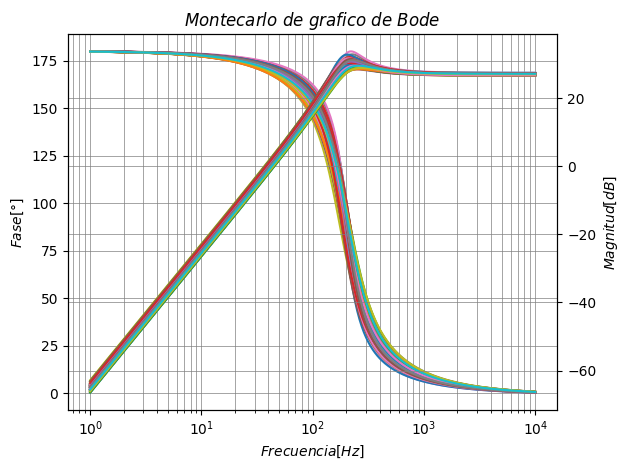

(array([0.229035 , 0.2672075, 0.30538  , 0.30538  , 0.3435525, 0.381725 ,
        0.4962425, 0.2672075, 0.30538  , 0.2672075, 0.1908625, 0.1908625,
        0.076345 , 0.076345 , 0.       , 0.       , 0.076345 , 0.       ,
        0.       , 0.0381725]),
 array([28.46416941, 28.7261381 , 28.9881068 , 29.25007549, 29.51204419,
        29.77401288, 30.03598158, 30.29795027, 30.55991896, 30.82188766,
        31.08385635, 31.34582505, 31.60779374, 31.86976244, 32.13173113,
        32.39369983, 32.65566852, 32.91763722, 33.17960591, 33.4415746 ,
        33.7035433 ]),
 <BarContainer object of 20 artists>)

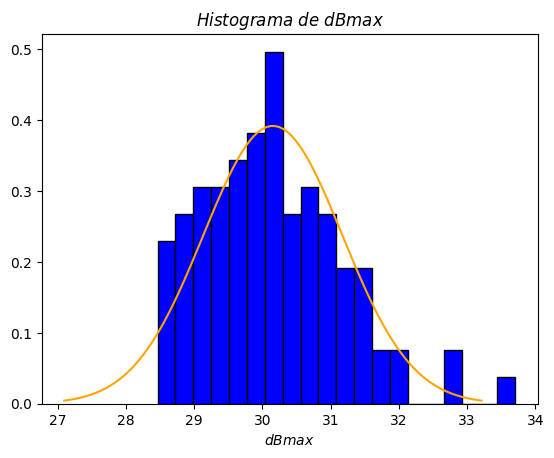

In [16]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import scipy as signal


#Arreglo para histograma
dBmax = []

#Nombre del archivo .raw
montecarlo = "../ltspice/opamp_tl082 (montecarlo).raw"
gnd_tl = "../ltspice/opamp_tl082 (gnd).raw"
corto_tl = "../ltspice/opamp_tl082 (corto + y out).raw"

data_montecarlo = ltspice.Ltspice(montecarlo)
data_montecarlo.parse()

#Plot de montecarlo
    #Obtengo los datos de frecuencia
frec = data_montecarlo.get_frequency()

fig, ax1 = plt.subplots()
ax1.set_title('$Montecarlo$ $de$ $grafico$ $de$ $Bode$')
ax2 = ax1.twinx()


for i in range(0, data_montecarlo.getCaseNumber() - 1):

    vout_montecarlo = data_montecarlo.get_data ('V(vout)', i)
    phase = np.angle(vout_montecarlo, deg=True)

    #Obtengo el maximo de dB
    dBmax.append(np.real(max(20*np.log10(vout_montecarlo))))

    #Grafico de fase(f)
    ax1.semilogx(frec, phase, label='Phase vout_montecarlo')
    ax1.set_xlabel('$Frecuencia [Hz]$')
    ax1.set_ylabel('$Fase [°]$')



    #Grafico de dB(f)
    ax2.semilogx(frec, 20*np.log10(vout_montecarlo), label='dB vout_montecarlo')
    ax2.set_ylabel('$Magnitud [dB]$')


    # plt.semilogx(frec, phase, label='Phase vout_montecarlo')
    # plt.semilogx(frec, 20*np.log10(vout_montecarlo), label='dB vout_montecarlo')

#Grillas verticales
ax1.grid(which='both', axis='both', color='grey', linestyle='-', linewidth=0.5)
ax2.grid(which='both', axis='both', color='grey', linestyle='-', linewidth=0.5)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# print("Vout complex" , vout_montecarlo[0])
#     #Grafico de dB(f)
# plt.xlabel('$Frecuencia [Hz]$')
# plt.ylabel('$Magnitud [dB]$')
# plt.title('$Analisis$ $Montecarlo$ $de$ $dB(f)$')
# plt.grid(True)

# plt.show()


#Grafico de distribucion normal
    # Calcula la media
mu = np.mean(dBmax) #Media
    # Calcula la desviación estándar
sigma = np.std(dBmax) #Desviacion estandar


x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)  # Valores x para el rango deseado
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.power((x - mu)/sigma, 2))

plt.plot(x, y, color = "orange")



#Grafico de histograma
plt.title('$Histograma$ $de$ $dBmax$')#Titulo
plt.xlabel('$dBmax$')#Etiqueta eje x


plt.hist(dBmax, color = "blue", bins = 20, density = True, edgecolor = "black")#Histograma



